In [24]:
import os
import librosa

from ai_arabic import (
    load_and_extract_melody, apply_median_filter, extract_melody_librosa,
    plot_melody, plot_time_series, plot_stft, plot_combined_frequencies,
    apply_kde_and_extract_peaks, extract_all_frequencies,
    calculate_all_intervals_in_cents, calculate_positive_intervals_in_cents,
    compare_intervals_to_jins
)


In [48]:
filename = 'segah--unknown_artist--Un_Voyage_Avec_Le_Oud_Arabe_2--21_Taqsim_Sikah_(Salem_Phone).mp3'
# filename = 'testaudio.mp3'

file_path = os.path.join('./data/recordings', filename)
# file_path = filename

In [52]:
y, sr = librosa.load(file_path, sr=None, duration=None)

In [53]:
y

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

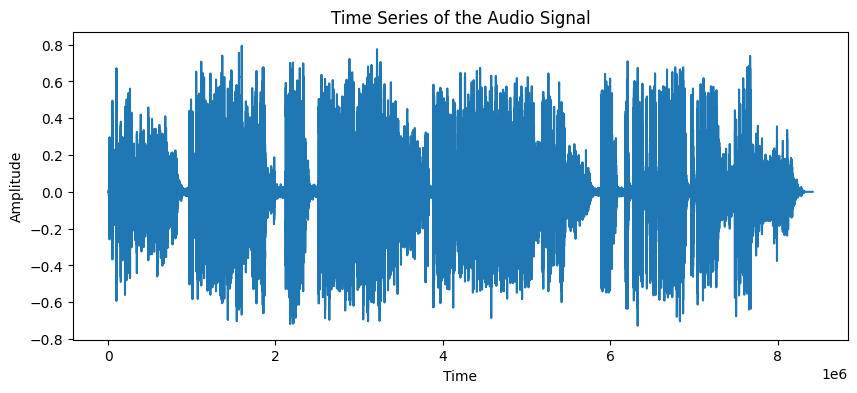

/var/folders/q4/_twpfpf54f3f6s17s74p67tc0000gp/T/ipykernel_23811/3109852218.py:14: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  librosa.display.specshow(librosa.amplitude_to_db(stft, ref=np.max), y_axis='log', x_axis='time')


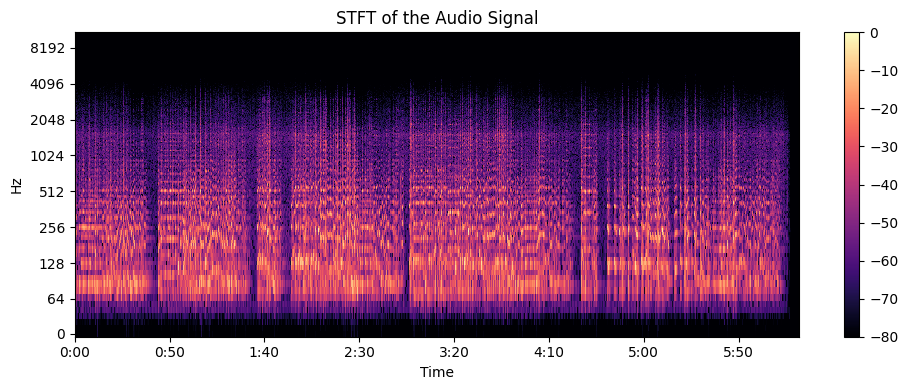

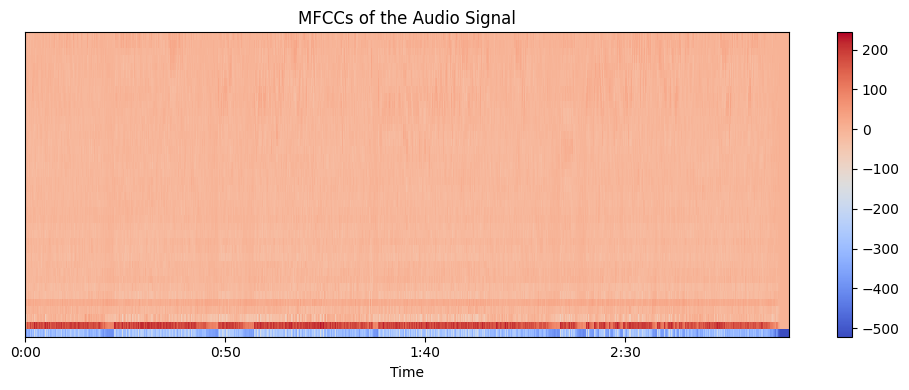

In [54]:
import matplotlib.pyplot as plt
import numpy as np
# Plotting the time series of the audio signal
plt.figure(figsize=(10, 4))
plt.plot(y)
plt.title('Time Series of the Audio Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

# Plotting the Short-Time Fourier Transform (STFT) of the audio signal
stft = librosa.stft(y)
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(stft, ref=np.max), y_axis='log', x_axis='time')
plt.colorbar()
plt.title('STFT of the Audio Signal')
plt.tight_layout()
plt.show()

# Plotting the Mel-Frequency Cepstral Coefficients (MFCCs) of the audio signal
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.colorbar()
plt.title('MFCCs of the Audio Signal')
plt.tight_layout()
plt.show()

In [55]:
# Extract melody frequencies
threshold_ratio = 0.3
fmin=librosa.note_to_hz('C2')
fmax=librosa.note_to_hz('C7')
hop_length=512
frame_length=2048
size=5
duration=None


melody_frequencies = extract_melody_librosa(y, sr, threshold_ratio=threshold_ratio, fmin=fmin, 
                                            fmax=fmax, hop_length=hop_length, frame_length=frame_length, 
                                            size=size, duration=duration)
print("Extracted Frequencies:", melody_frequencies)



Extracted Frequencies: [nan nan nan ... nan nan nan]


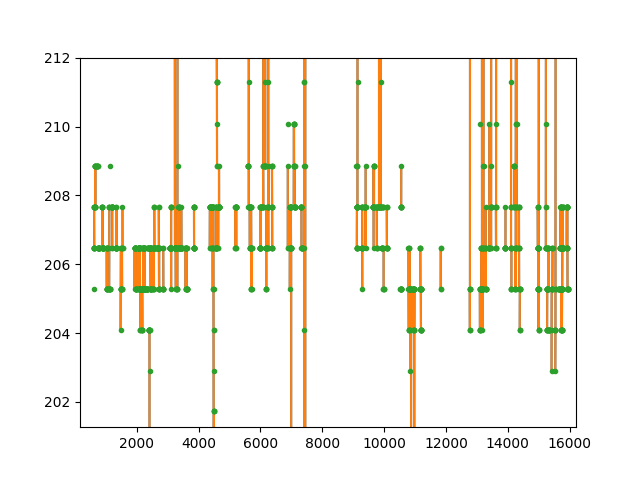

In [59]:
%matplotlib widget
# Plot
import matplotlib.pyplot as plt
plt.plot(melody_frequencies, '.')
plt.show()



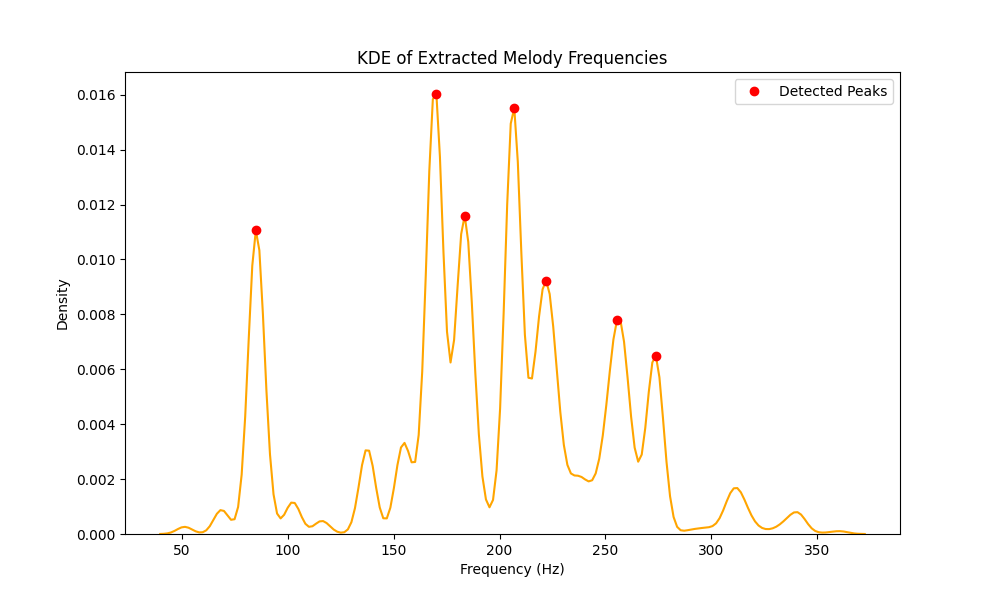

Prominent frequencies detected: [ 84.91450946 170.18725165 183.56336807 206.97157181 222.01970278
 255.45999384 273.85215392]


In [65]:
bandwidth=0.4
peak_distance=5
peak_height=0.004 # Find a more systematic way to determine this

# Apply KDE and extract prominent frequencies
prominent_frequencies = apply_kde_and_extract_peaks(melody_frequencies,
                        bandwidth=bandwidth, peak_distance=peak_distance, peak_height=peak_height)
print("Prominent frequencies detected:", prominent_frequencies)


In [69]:

# Calculate positive intervals in cents
positive_intervals_array = calculate_all_intervals_in_cents(prominent_frequencies)
print("Strictly positive intervals in cents between frequencies:")
print(positive_intervals_array)


Strictly positive intervals in cents between frequencies:
[[    0.          1203.647972    1334.63422531  1542.41955282
   1663.92565992  1906.81725734  2027.1770787 ]
 [-1203.647972       0.           130.98625331   338.77158082
    460.27768792   703.16928534   823.52910671]
 [-1334.63422531  -130.98625331     0.           207.78532751
    329.29143461   572.18303204   692.5428534 ]
 [-1542.41955282  -338.77158082  -207.78532751     0.
    121.5061071    364.39770452   484.75752588]
 [-1663.92565992  -460.27768792  -329.29143461  -121.5061071
      0.           242.89159742   363.25141878]
 [-1906.81725734  -703.16928534  -572.18303204  -364.39770452
   -242.89159742     0.           120.35982136]
 [-2027.1770787   -823.52910671  -692.5428534   -484.75752588
   -363.25141878  -120.35982136     0.        ]]


In [70]:
positive_intervals_array.shape

(7, 7)

In [ ]:

# Compare intervals to Jins templates
closest_jins, difference = compare_intervals_to_jins([250, 450, 550])  # Example intervals
print(f"The extracted intervals are closest to {closest_jins} with a total difference of {difference} cents.")


In [ ]:

# Plotting (Example)
# Load audio for plotting
y, sr = librosa.load(file_path, sr=None)
plot_time_series(y, sr, duration=100000/sr)  # Adjust duration as needed
plot_stft(y, sr)

# Extract all frequencies and plot
times_all, freqs_all = extract_all_frequencies(file_path)
times_melody, freqs_melody = librosa.times_like(melody_frequencies, sr=sr, hop_length=512), melody_frequencies
plot_combined_frequencies(times_all, freqs_all, times_melody, freqs_melody)